# Setup and Pre-Processing

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

mnist = tf.keras.datasets.mnist

# x has image data and y has labels
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Showing first image in color & grayscale
# plt.imshow(x_train[1])
# plt.show()
# plt.imshow(x_train[1], cmap = plt.cm.binary)
# plt.show()

"""Pre-Processing"""

# normalizing range: 0-255 -> 0-1
x_train = tf.keras.utils.normalize(x_train, axis = 1)
# print(x_train[0])
x_test = tf.keras.utils.normalize(x_test, axis = 1)

# Resizing images to make them suitable for convolution operation
## https://www.w3schools.com/python/numpy/numpy_array_reshape.asp
IMG_SIZE = 28

# Merge inputs and targets
inputs = np.concatenate((x_train, x_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

# Resize for kernel operations
inputs_r = np.array(inputs).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# Creating & Training Deep Neural Network
(with k-fold cross-validation)

In [2]:
# Training on 60000 samples of MNIST handwritten dataset
from tensorflow.keras.models import Sequential # "Sequentially" connect the layers
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D # These are the layers
from sklearn.model_selection import KFold

# Define the K-fold Cross Validator
kfold = KFold(n_splits=5, shuffle=True)
acc_per_fold = []
loss_per_fold = []
training_metrics = []

fold_no = 1
for train, test in kfold.split(inputs_r, targets):
  # Creating a neural network
  model = Sequential()

  ## First Convolution Layer
  model.add(Conv2D(64, (3, 3), input_shape = inputs_r.shape[1:]))
  model.add(Activation("relu"))
  model.add(MaxPooling2D(pool_size = (2, 2)))

  ## Second Convolution Layer
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation("relu"))
  model.add(MaxPooling2D(pool_size = (2, 2)))

  ## Fully connected layer 1
  model.add(Flatten())
  model.add(Dense(64))
  model.add(Dropout(0.5))
  model.add(Activation("relu"))

  ## Fully connected layer 2
  model.add(Dense(32))
  model.add(Dropout(0.5))
  model.add(Activation("relu"))

  ## Last fully connected layer (Output layer)
  model.add(Dense(10))
  model.add(Activation("softmax"))

  
  # Last step of setup
  model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])


  # Separate folds
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(inputs_r[train], targets[train], epochs = 12)

  # Collect training metrics (accuracy & loss) on each epoch
  training_metrics.append(history.history)
  
  # Generate and store overall model metrics
  scores = model.evaluate(inputs_r[test], targets[test])
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/12
1750/1750 [==============================] - 31s 18ms/step - loss: 0.8066 - accuracy: 0.7251
Epoch 2/12
1750/1750 [==============================] - 38s 22ms/step - loss: 0.4065 - accuracy: 0.8730
Epoch 3/12
1750/1750 [==============================] - 37s 21ms/step - loss: 0.3329 - accuracy: 0.8971
Epoch 4/12
1750/1750 [==============================] - 40s 23ms/step - loss: 0.2857 - accuracy: 0.9109
Epoch 5/12
1750/1750 [==============================] - 40s 23ms/step - loss: 0.2635 - accuracy: 0.9187
Epoch 6/12
1750/1750 [==============================] - 41s 23ms/step - loss: 0.2410 - accuracy: 0.9253
Epoch 7/12
1750/1750 [==============================] - 39s 22ms/step - loss: 0.2275 - accuracy: 0.9288
Epoch 8/12
1750/1750 [==============================] - 43s 24ms/step - loss: 0.2196 - accuracy: 0.9307
Epoch 9/12
1750/1750 [==============================] - 38s 22ms/step -

# Store Data

In [7]:
acc_per_fold1 = [x/100 for x in acc_per_fold]
with open("5x5_metrics.py", "w") as file:
  file.write("acc_per_fold = " + str(acc_per_fold1) +
             "\nloss_per_fold = " + str(loss_per_fold) +
             "\ntraining_metrics = " + str(training_metrics))

# Data Visualization

### Fold Metrics

#### Accuracy by Fold

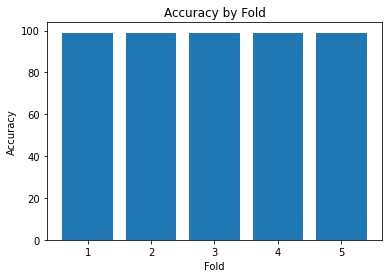

In [5]:
x_fold = range(1, 6);
y_fold_acc = acc_per_fold

fig, ax = plt.subplots()
fig.set_facecolor("white")

ax.bar(x_fold, y_fold_acc)

# Title and Axes
ax.set_title("Accuracy by Fold")
ax.set_xlabel("Fold")
ax.set_ylabel("Accuracy")
ax.set_xticks(x_fold)

plt.show()

#### Loss by Fold

### Accuracy vs. Epoch

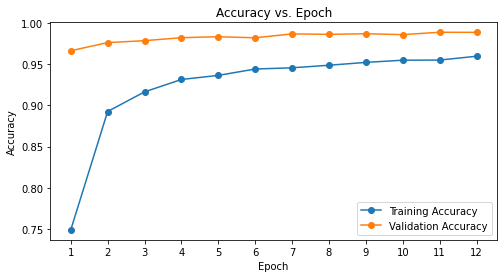

In [17]:
y_acc = history.history["accuracy"]
y_val_acc = history.history["val_accuracy"]
x_acc = range(1, len(y_acc)+1)

fig, ax = plt.subplots(figsize=(8, 4))
fig.set_facecolor("white")

ax.plot(x_acc, y_acc, "-o", label="Training Accuracy")
ax.plot(x_acc, y_val_acc, "-o", label="Validation Accuracy")

# Title and Axes
ax.set_title("Accuracy vs. Epoch")
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")
ax.set_xticks(x_acc)

# Legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

plt.show()

### Loss vs. Epoch

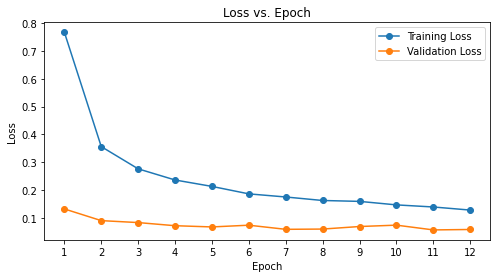

In [19]:
y_loss = history.history["loss"]
y_val_loss = history.history["val_loss"]
x_loss = range(1, len(y_loss)+1)

fig, ax = plt.subplots(figsize=(8, 4))
fig.set_facecolor("white")

ax.plot(x_loss, y_loss, "-o", label="Training Loss")
ax.plot(x_loss, y_val_loss, "-o", label="Validation Loss")

# Title and Axes
ax.set_title("Loss vs. Epoch")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.set_xticks(x_loss)

# Legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

plt.show()

In [5]:
test_loss, test_acc = model.evaluate(x_testr, y_test)
print("Test loss on 10,000 test samples:", test_loss)
print("Validation accuracy on 10,000 test samples:", test_acc)

313/313 [==============================] - 1s 5ms/step - loss: 0.0651 - accuracy: 0.9891
Test loss on 10,000 test samples: 0.06506707519292831
Validation accuracy on 10,000 test samples: 0.9890999794006348
